In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('housing_encoded.csv')
df = df.sort_values(by='area')

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Define the features and target variable
X = df.drop(columns=['price'])
y = df['price']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

decision_tree = DecisionTreeRegressor(random_state=0)
random_forest = RandomForestRegressor(n_estimators=100,random_state=0)


decision_tree_results = evaluate_model(decision_tree, X_train, X_test, y_train, y_test)
random_forest_results = evaluate_model(random_forest, X_train, X_test, y_train, y_test)

print(decision_tree_results)
print(random_forest_results)
print('Random Forest performs better than Decision Tree')

{'MAE': 1096522.385321101, 'MSE': 2268999635629.358, 'R2 Score': 0.16343933911174457}
{'MAE': 748102.6651376147, 'MSE': 928925941815.7336, 'R2 Score': 0.6575129904831085}
Random Forest performs better than Decision Tree


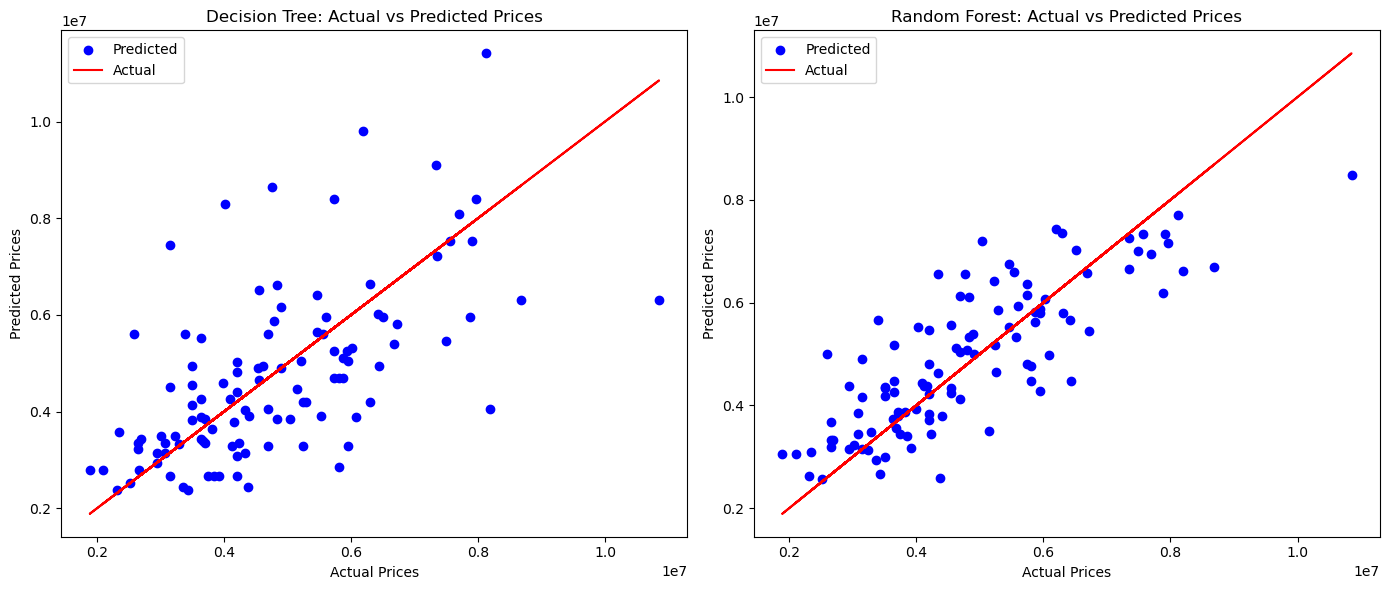

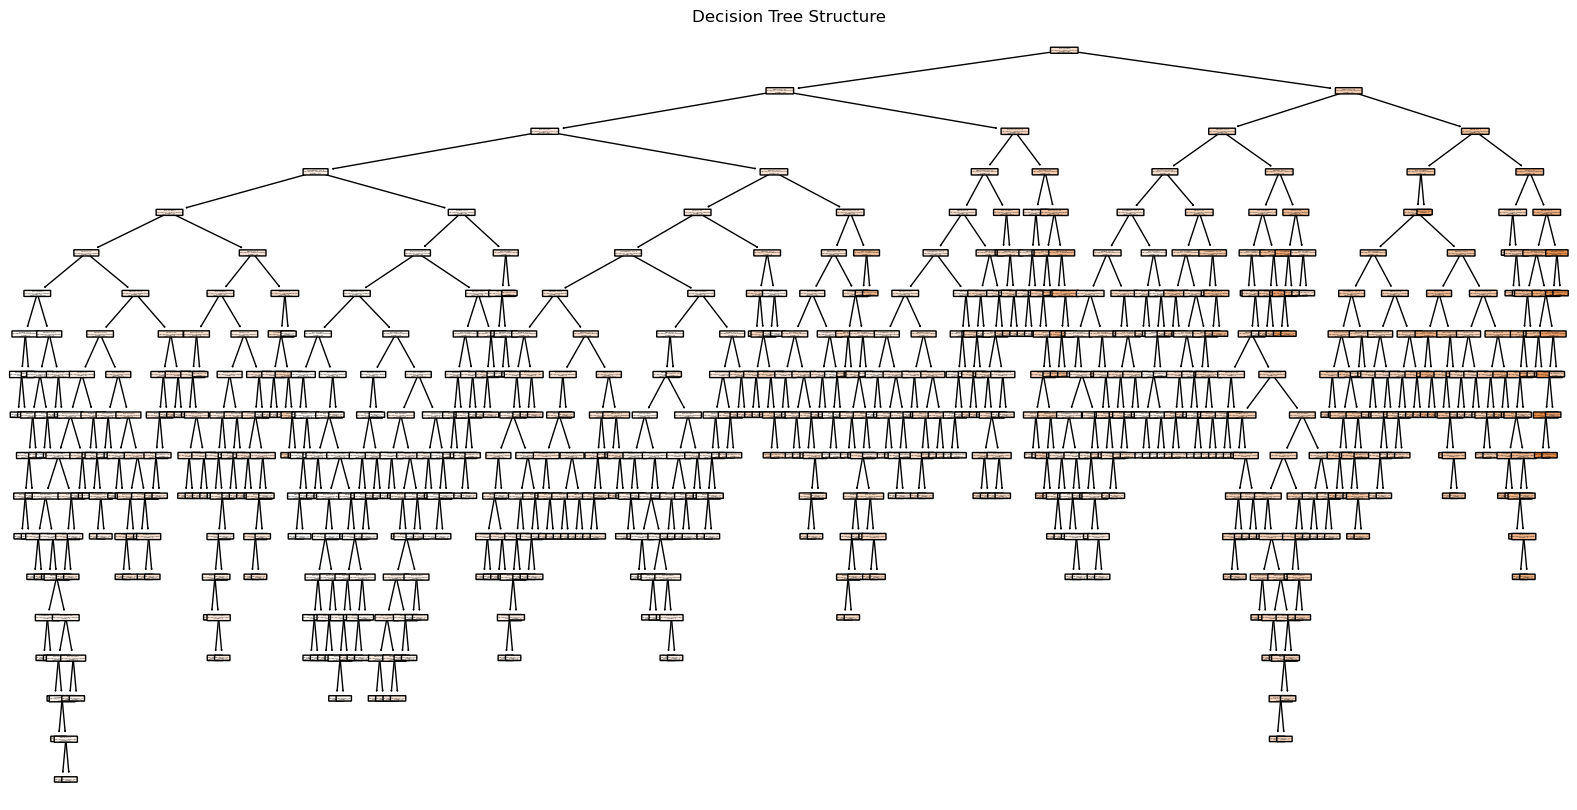

In [13]:
from sklearn.tree import plot_tree

# Import necessary libraries for plotting

# Plotting the performance of both models
plt.figure(figsize=(14, 6))

# Plotting Decision Tree predictions vs actual values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_decision_tree, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.legend()

# Plotting Random Forest predictions vs actual values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_random_forest, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names= list(X.columns), rounded=True)
plt.title('Decision Tree Structure')
plt.show()
